# Imports


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split


# Paths

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = "/content/kc_house_data.csv"

# Load Data

In [4]:
df = pd.read_csv(DATA_PATH)

# EDA (Exploratory Data Analysis)

# Statistical Analysis

In [ ]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10901,2155000160,20140508T000000,538000.0,4,1.75,1840,9600,1.0,0,0,...,7,1220,620,1967,0,98052,47.6579,-122.125,1770,9720
4894,1771100130,20150316T000000,332900.0,3,1.50,1190,11996,1.0,0,0,...,7,1190,0,1969,0,98077,47.7561,-122.071,1190,9756
9371,8651401720,20140918T000000,215000.0,3,1.50,1610,5304,1.0,0,0,...,6,1610,0,1968,0,98042,47.3632,-122.087,1060,5304
8907,104550540,20150120T000000,259950.0,4,2.00,1610,6650,1.0,0,0,...,7,1610,0,1989,0,98023,47.3085,-122.358,1960,6650
14710,3876540410,20150413T000000,242000.0,3,2.25,1690,7292,1.0,0,0,...,7,1250,440,1985,0,98003,47.2639,-122.303,1670,7747


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Graphical Analysis

Distribution of House Prices

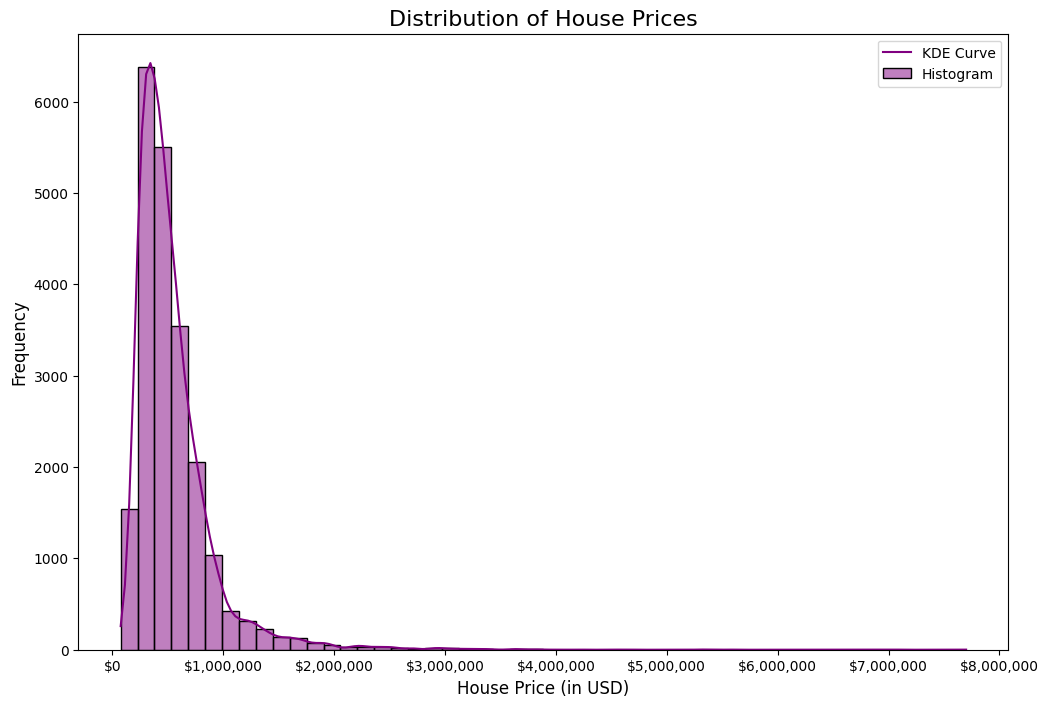

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histogram with KDE
sns.histplot(df['price'], kde=True, color='purple', bins=50)

# Add a title
plt.title('Distribution of House Prices', fontsize=16)

# Add x and y labels
plt.xlabel('House Price (in USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Format the x-axis to show prices in a readable way
formatter = mticker.FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Customize tick sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend for clarity
plt.legend(['KDE Curve', 'Histogram'], loc='upper right', fontsize=10)
plt.show()

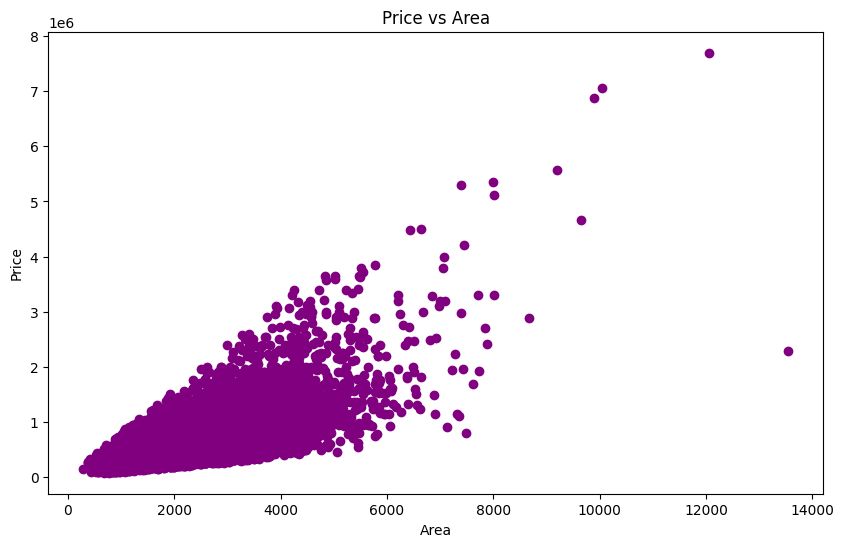

In [ ]:
# Ensure 'title' function is available from 'matplotlib.pyplot'
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'], color = 'purple')

# Call the 'title' function correctly
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

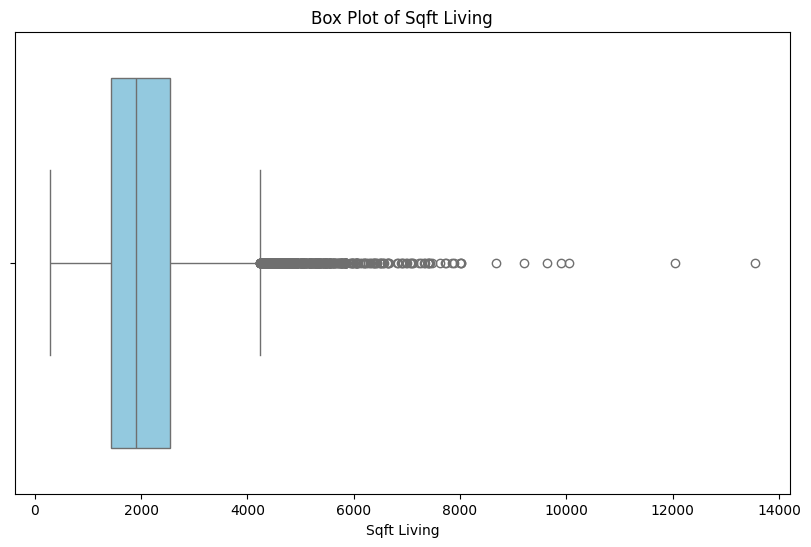

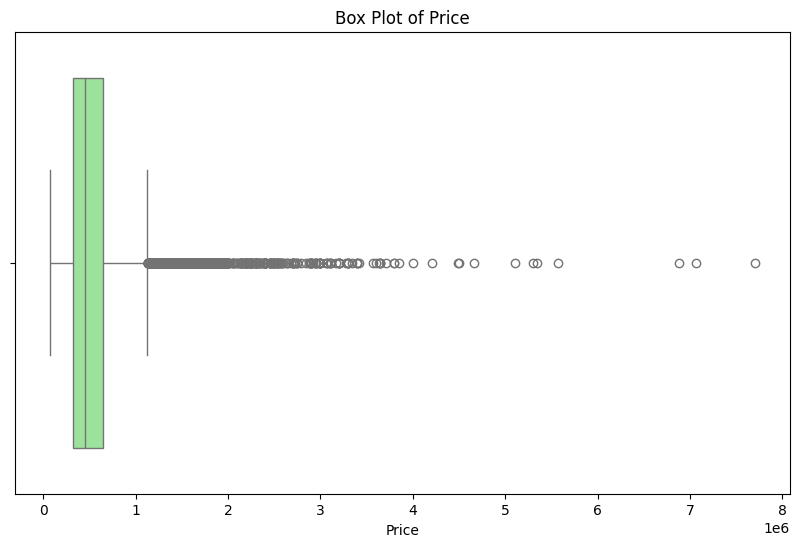

In [15]:
# Visualize outliers in sqft_living using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sqft_living'], color='skyblue')
plt.title("Box Plot of Sqft Living")
plt.xlabel("Sqft Living")
plt.show()

# Visualize outliers in price using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='lightgreen')
plt.title("Box Plot of Price")
plt.xlabel("Price")
plt.show()

Removing Outliers

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
filtered_data = remove_outliers(df, 'sqft_living')
filtered_data = remove_outliers(filtered_data, 'price')

Filtered Data

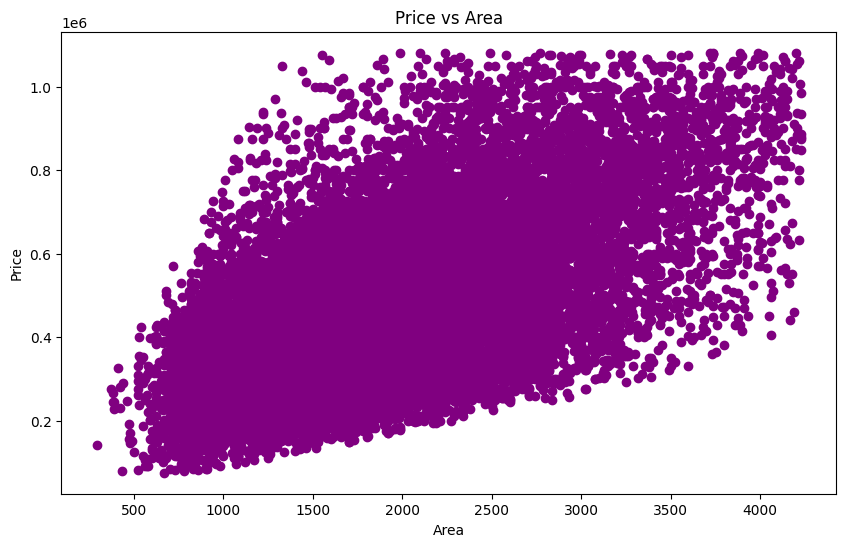

In [13]:
# Ensure 'title' function is available from 'matplotlib.pyplot'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['sqft_living'], filtered_data['price'], color = 'purple')

# Call the 'title' function correctly
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Correlation Matrix between the price column and other numeric columns

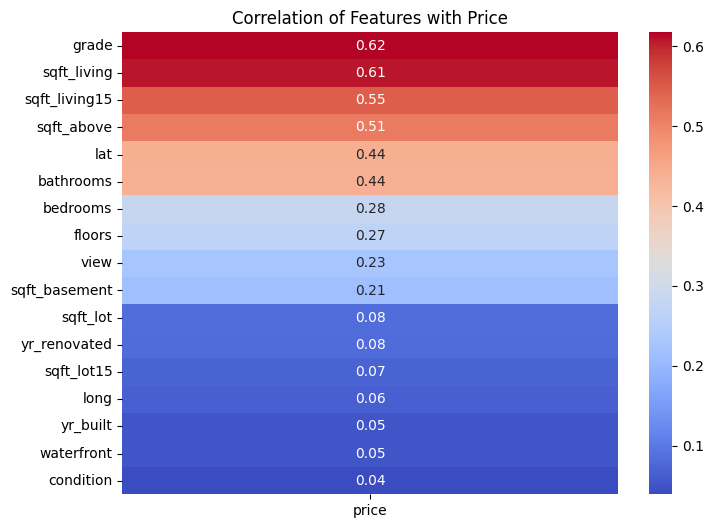

In [16]:
df_filtered = filtered_data.drop(columns=['id', 'zipcode'])
correlation_matrix = df_filtered.select_dtypes(include=np.number).corr()
price_correlations = correlation_matrix[['price']].drop(index='price').sort_values(by='price', ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Features with Price')
plt.show()

# Linear Regression

Class for Linear Regression


In [57]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        X = np.hstack((np.ones((n_samples, 1)), X))
        self.weights = np.zeros(n_features + 1)
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights)
            gradient = (1 / n_samples) * np.dot(X.T, (y_predicted - Y))
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.weights)

Assigning price to Y and Area to X and casting it into the Numpy arrays

In [51]:
Y = filtered_data['price'].values #Target
X = filtered_data[['sqft_living']].values #Data

Splitting data into test and train data

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Training

In [58]:
model = LinearRegression(learning_rate=0.01, n_iters=1000)
model.fit(X_train, Y_train)

<ipython-input-57-d31c557178fe>:15: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradient


Testing

In [60]:
predictions = model.predict(X)

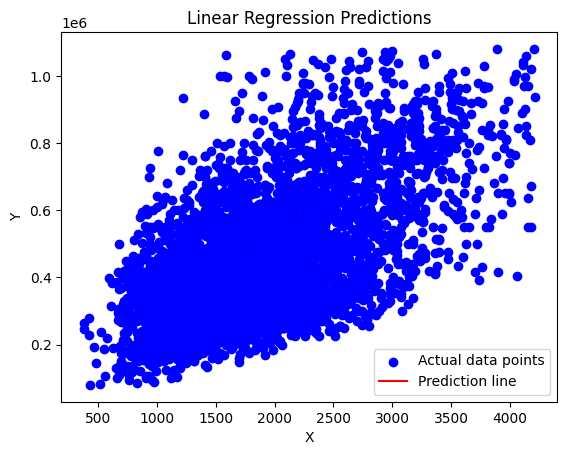

In [66]:
plt.scatter(X_test, Y_test, color='blue', label='Actual data points', marker='o')
plt.plot(X_test, predictions, color='red', label='Prediction line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()